In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gstools as gs
from pykrige.ok import OrdinaryKriging

Read the file, there was a syntax issue on line 10405

In [16]:
df = pd.read_csv("../../All Earthquakes.csv")
df

,No.,Orgin date,Longitude(E),Latitude(N),Magnitude,Depth,Location,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Small area,2025-02-12 0:09,121.942,24.3840,3.8,24.3,24.38N 121.94E,i.e. 42.5 km SSE of Yilan County(24.38N 121.94E,i.e. 42.5 km SSE of Yilan County),NaN,NaN
1,64,2025-02-11 22:04,121.665,24.1742,4.0,13.3,24.17N 121.66E,i.e. 20.8 km NNE of Hualien County(24.17N 121...,i.e. 20.8 km NNE of Hualien County),NaN,NaN
2,Small area,2025-02-11 20:46,120.459,23.5483,3.2,5.6,23.55N 120.46E,i.e. 19.6 km ENE of Chiayi County(23.55N 120.46E,i.e. 19.6 km ENE of Chiayi County),NaN,NaN
3,63,2025-02-11 15:52,120.496,23.2458,4.1,7.7,23.25N 120.50E,i.e. 42.5 km NE of Tainan City(23.25N 120.50E,i.e. 42.5 km NE of Tainan City),NaN,NaN
4,Small area,2025-02-11 15:45,120.505,23.2862,3.6,7.5,23.29N 120.50E,i.e. 46.2 km NE of Tainan City(23.29N 120.50E,i.e. 46.2 km NE of Tainan City),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15961,5,1997-01-16 9:07,121.300,22.0100,5.4,8.9,22.01N 121.30E,i.e. 26.4 km W of Lanyu,Taitung(22.01N 121.30E,i.e. 26.4 km W of Lanyu,Taitung)
15962,4,1997-01-09 17:08,121.530,22.9300,4.1,6.9,22.93N 121.53E,i.e. 43.5 km ENE of Taitung City(22.93N 121.53E,i.e. 43.5 km ENE of Taitung City),NaN,NaN
15963,3,1997-01-08 20:14,121.380,22.7900,4.1,3.2,22.79N 121.38E,i.e. 23.4 km E of Taitung City(22.79N 121.38E,i.e. 23.4 km E of Taitung City),NaN,NaN
15964,2,1997-01-05 18:34,122.530,24.6200,5.8,1.1,24.62N 122.53E,i.e. 79.9 km E of Yilan City(24.62N 122.53E,i.e. 79.9 km E of Yilan City),NaN,NaN


## Main idea:

### Data prep
- Extract longitude, latitude, and magnitudes from your dataset.
- Define a grid covering the geographic range of your data.

### Variogram Modeling:
- The exponential variogram model is used here. Adjust based on your data’s spatial correlation (check ok.variogram_model_parameters).

### Kriging Interpolation:
- OrdinaryKriging estimates magnitudes at unobserved locations using spatial correlations.
- The output z is the interpolated magnitude grid, and ss is the kriging variance (uncertainty).

### Visualization:
- The heatmap shows interpolated magnitudes, with observed data points overlaid.

In [18]:
# Extract coordinates and magnitudes
lon = df["Longitude(E)"].values
lat = df["Latitude(N)"].values
mag = df["Magnitude"].values

# Define grid for interpolation
# grid_lon = np.linspace(min(lon)-0.1, max(lon)+0.1, 100)
# grid_lat = np.linspace(min(lat)-0.1, max(lat)+0.1, 100)
grid_lon = np.linspace(min(lon)-0.1, max(lon)+0.1, 20)  # Reduced to 20 points
grid_lat = np.linspace(min(lat)-0.1, max(lat)+0.1, 20)

# Perform Ordinary Kriging
# ok = OrdinaryKriging(
#     lon, lat, mag,
#     variogram_model="exponential",  # Options: linear, power, gaussian, spherical, exponential
#     nlags=6,
#     verbose=True
# )
ok = OrdinaryKriging(
    lon, lat, mag,
    variogram_model="exponential",
    variogram_parameters={"sill": 0.5, "nugget": 0.1, "range": 0.5},  # Adjust these!
    nlags=3,  # Reduce nlags (small dataset)
    verbose=True
)

# Interpolate magnitudes on the grid
z, ss = ok.execute("grid", grid_lon, grid_lat)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 0.4
Full Sill: 0.5
Range: 0.5
Nugget: 0.1 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



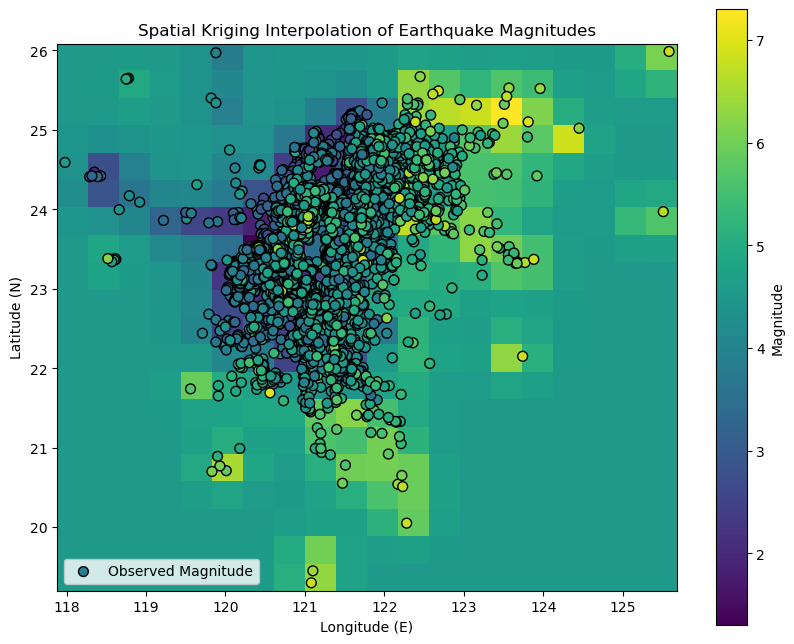

In [19]:
# Plot results
plt.figure(figsize=(10, 8))
plt.imshow(
    z,
    origin="lower",
    extent=[min(grid_lon), max(grid_lon), min(grid_lat), max(grid_lat)],
    cmap="viridis",
)
plt.scatter(lon, lat, c=mag, s=50, edgecolor="k", cmap="viridis", label="Observed Magnitude")
plt.colorbar(label="Magnitude")
plt.xlabel("Longitude (E)")
plt.ylabel("Latitude (N)")
plt.title("Spatial Kriging Interpolation of Earthquake Magnitudes")
plt.legend()
plt.show()

### Adapting for different time interpolations


Add time as a tool in the model 

In [ ]:
df["time"] = pd.to_datetime(df["Orgin date"]).astype("int64") // 1e9  # Unix timestamp
time_norm = (df["time"] - df["time"].min()) / 3600  # Hours since first event

# Create a 3D model
model = gs.SpatioTemporal(
    model_spatial=gs.Gaussian(dim=2),  # Spatial component
    model_temporal=gs.Exponential(),   # Temporal component
)



AttributeError: module 'gstools' has no attribute 'SpatioTemporal'

In [ ]:
# Perform kriging
krige = gs.krige.SpatioTemporal(model, [x, y, t], values)

# Predict at a new spacetime point (e.g., 2025-02-11 18:00)
new_time = (pd.Timestamp("2025-02-11 18:00").value // 1e9 - time_min) / 3600
pred_mag, pred_var = krige([121.5, 24.0, new_time])  # (longitude, latitude, time)
print(f"Predicted Magnitude: {pred_mag[0]:.2f} ± {np.sqrt(pred_var[0]):.2f}")